We compute a principal component analysis for the output variables Score, Upvote Ratio, Total Number of Comments

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("WSBSubmissonsdataActual.pkl")

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components = 3)

We perform a train-test split

In [5]:
df_copy = df.copy()
df_train = df_copy.sample(frac=.8)
df_test = df_copy.drop(df_train.index)

We select the Score, Number of Comments, and Upvote Ratio columns.

In [6]:
outputs = df_train[['score', 'num_comments', 'upvote_ratio']]

In [7]:
outputs = outputs.astype(float)
outputs["norm_score"] = (outputs.score - outputs.score.mean()) / outputs.score.std()
outputs["norm_comments"] = (outputs.num_comments - outputs.num_comments.mean()) / outputs.num_comments.std()
outputs["norm_ratio"] = (outputs.upvote_ratio - outputs.upvote_ratio.mean()) / outputs.upvote_ratio.std()
outputs

,score,num_comments,upvote_ratio,norm_score,norm_comments,norm_ratio
mvez77,8950.0,969.0,0.89,-0.977544,-0.645296,-0.313391
mznz4d,27745.0,973.0,0.96,-0.744071,-0.644510,0.728174
lae6j0,210796.0,18671.0,0.95,1.529796,2.832042,0.579379
nff5e4,415.0,128.0,0.82,-1.083566,-0.810499,-1.354957
n77rdn,8213.0,897.0,0.84,-0.986699,-0.659439,-1.057367
...,...,...,...,...,...,...
l7aj2e,147925.0,1858.0,0.97,0.748809,-0.470663,0.876969
nfktu5,221.0,165.0,0.79,-1.085976,-0.803231,-1.801342
m0q5bm,165536.0,8280.0,0.93,0.967574,0.790859,0.281789
lazmky,178586.0,4416.0,0.93,1.129682,0.031825,0.281789


We run the PCA on these columns

In [8]:
norm_outputs = outputs[['norm_score', 'norm_comments', 'norm_ratio']]

In [9]:
pca.fit(norm_outputs)

PCA(n_components=3)

We plot out original data.

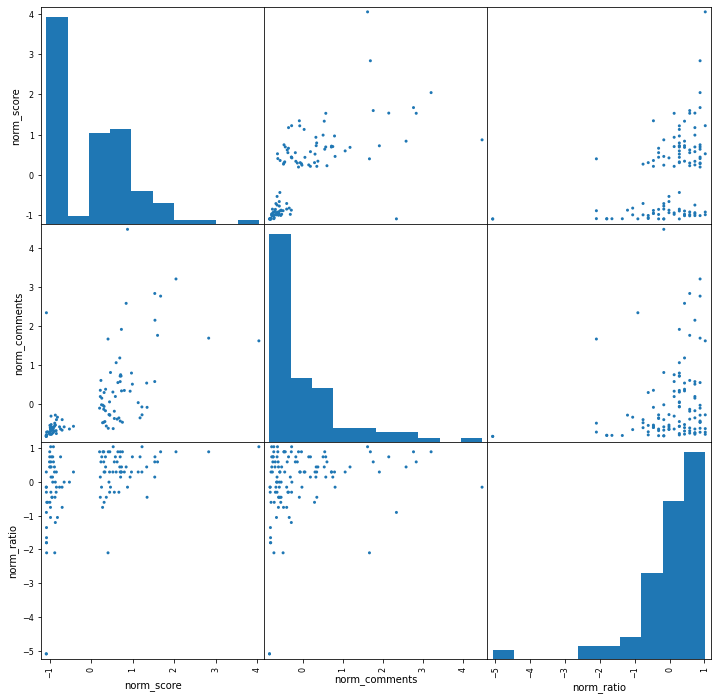

In [10]:
pd.plotting.scatter_matrix(norm_outputs, figsize = (12,12), alpha=1)
plt.show()

We assign our principal components to "fit".

In [11]:
fit = pca.transform(norm_outputs)

We plot in the new coordinate system.

In [12]:
final = pd.DataFrame(fit, columns = ['Axis1', 'Axis2', 'Axis3'])

In [13]:
print(pca.explained_variance_ratio_)

[0.62825832 0.27332253 0.09841915]


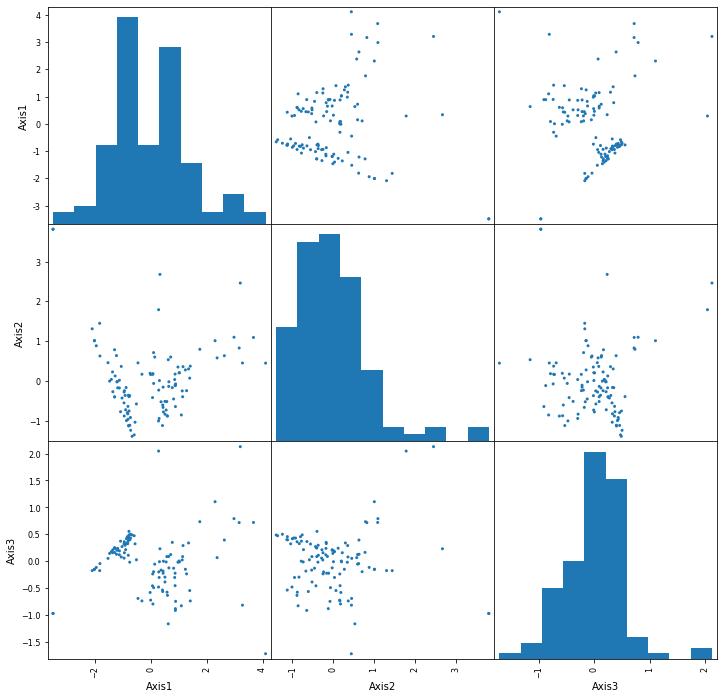

In [14]:
pd.plotting.scatter_matrix(final, figsize = (12,12), alpha=1)
plt.show()

In [15]:
pca.components_

array([[ 0.66154162,  0.60287027,  0.44599341],
       [ 0.13176752,  0.49202886, -0.8605492 ],
       [-0.73824116,  0.62805655,  0.24605885]])

In [18]:
outputs["principal"] = outputs.norm_score * 0.66154162 + outputs.norm_comments * 0.60287027 + outputs.norm_ratio * 0.44599341

In [19]:
outputs

,score,num_comments,upvote_ratio,norm_score,norm_comments,norm_ratio,principal
mvez77,8950.0,969.0,0.89,-0.977544,-0.645296,-0.313391,-1.175486
mznz4d,27745.0,973.0,0.96,-0.744071,-0.644510,0.728174,-0.556029
lae6j0,210796.0,18671.0,0.95,1.529796,2.832042,0.579379,2.977776
nff5e4,415.0,128.0,0.82,-1.083566,-0.810499,-1.354957,-1.809752
n77rdn,8213.0,897.0,0.84,-0.986699,-0.659439,-1.057367,-1.521877
...,...,...,...,...,...,...,...
l7aj2e,147925.0,1858.0,0.97,0.748809,-0.470663,0.876969,0.602743
nfktu5,221.0,165.0,0.79,-1.085976,-0.803231,-1.801342,-2.006049
m0q5bm,165536.0,8280.0,0.93,0.967574,0.790859,0.281789,1.242552
lazmky,178586.0,4416.0,0.93,1.129682,0.031825,0.281789,0.892194


In [20]:
import numpy as np

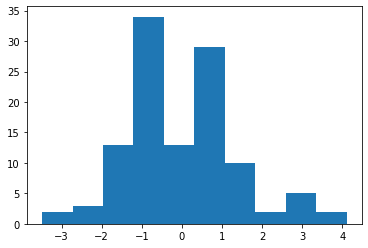

In [22]:
plt.hist(outputs.principal)
plt.show()

In [48]:
outputs["cutoff"] = outputs.principal > 0
outputs["cutoff"] = outputs["cutoff"].astype(int)

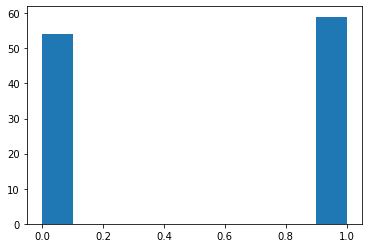

In [49]:
plt.hist(outputs.cutoff)
plt.show()

In [50]:
xs = outputs[outputs.cutoff == 0]

In [51]:
os = outputs[outputs.cutoff == 1]

In [52]:
df_train["principal"] = outputs.principal

In [53]:
df_train["cutoff"] = outputs.cutoff

In [54]:
xs

,score,num_comments,upvote_ratio,norm_score,norm_comments,norm_ratio,principal,cutoff
mvez77,8950.0,969.0,0.89,-0.977544,-0.645296,-0.313391,-1.175486,0
mznz4d,27745.0,973.0,0.96,-0.744071,-0.644510,0.728174,-0.556029,0
nff5e4,415.0,128.0,0.82,-1.083566,-0.810499,-1.354957,-1.809752,0
n77rdn,8213.0,897.0,0.84,-0.986699,-0.659439,-1.057367,-1.521877,0
lerm8e,116617.0,1362.0,0.88,0.359900,-0.568096,-0.462186,-0.310531,0
n6am1n,6664.0,492.0,0.96,-1.005941,-0.738996,0.728174,-0.786230,0
murz9h,19555.0,382.0,0.93,-0.845808,-0.760604,0.281789,-0.892407,0
nc6qi3,16444.0,1739.0,0.77,-0.884453,-0.494039,-2.098932,-1.819053,0
nfa2ov,867.0,205.0,0.87,-1.077951,-0.795374,-0.610981,-1.465110,0
mtxbmn,15851.0,711.0,0.94,-0.891819,-0.695976,0.430584,-0.817521,0


In [55]:
xs = df_train[df_train.cutoff == 0]

In [56]:
os = df_train[df_train.cutoff == 1]

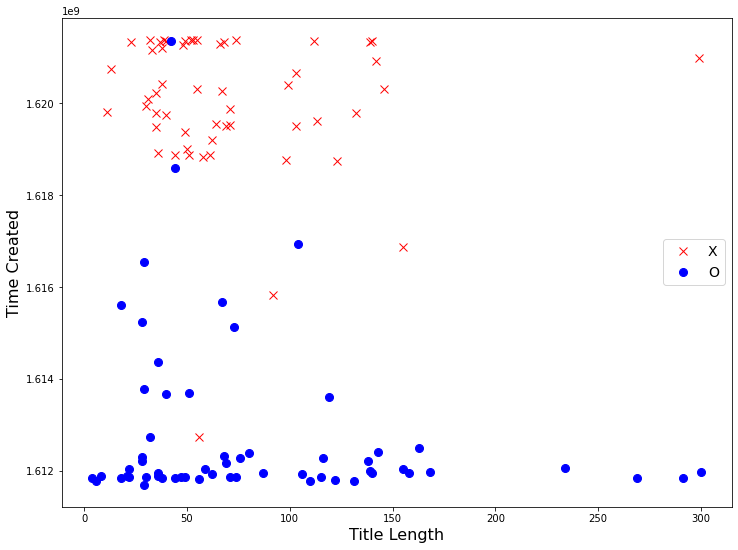

In [57]:
## We now plot that data
plt.figure(figsize = (12,9))

plt.plot(xs.title_length,xs.time_created,'rx',label = "X",markersize=8)
plt.plot(os.title_length,os.time_created,'bo',label = "O",markersize=8)
plt.xlabel("Title Length", fontsize = 16)
plt.ylabel("Time Created", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()

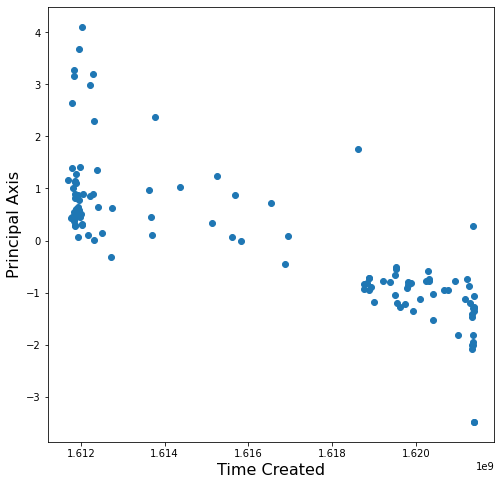

In [59]:
plt.figure(figsize = (8,8))

plt.scatter(df_train.time_created, df_train.principal)
plt.xlabel("Time Created", fontsize = 16)
plt.ylabel("Principal Axis", fontsize = 16)

plt.show()

In [62]:
df_train[['principal', 'time_created']].astype(float).corr()

,principal,time_created
principal,1.000000,-0.791788
time_created,-0.791788,1.000000
